In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
color = sns.color_palette()
%matplotlib inline
sns.set_context(rc={'figure.figsize': (16,12)})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# Import dataset
df = pd.read_csv('df1.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,index_orig,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,latitude,longitude,...,county,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,area_living
0,4176,12658092,0.0507,2016-01-21,2016,1,2.0,2,33339295.0,-118331034.0,...,3101.0,96207,0.0,1978,165947.0,327635.0,2015,161688.0,5433.63,1703
1,11374,12659026,-0.1661,2016-02-24,2016,2,2.0,2,33340045.0,-118325943.0,...,3101.0,96207,0.0,1920,300894.0,545689.0,2015,244795.0,7949.83,865
2,60917,12659032,-0.0471,2016-07-29,2016,7,3.0,3,33340134.0,-118325615.0,...,3101.0,96207,0.0,1996,265712.0,398565.0,2015,132853.0,6174.19,1500
3,38326,12658206,-0.0182,2016-05-24,2016,5,2.0,2,33340239.0,-118324732.0,...,3101.0,96207,0.0,1964,89781.0,139956.0,2015,50175.0,3036.02,1422
4,72995,12659124,0.0421,2016-09-02,2016,9,2.0,2,33340508.0,-118324950.0,...,3101.0,96207,0.0,1965,103700.0,271000.0,2015,167300.0,5934.02,902


[]

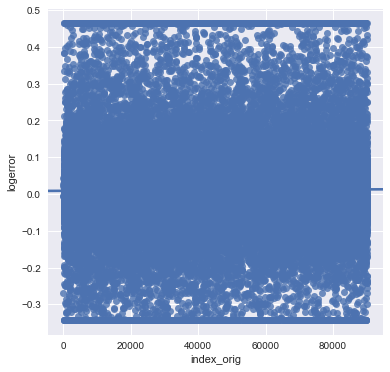

[]

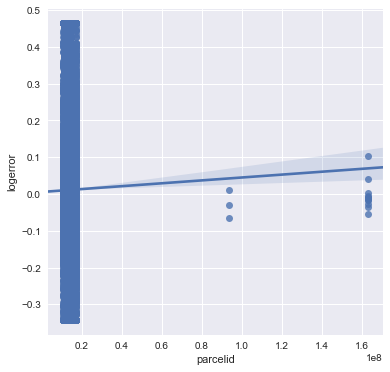

[]

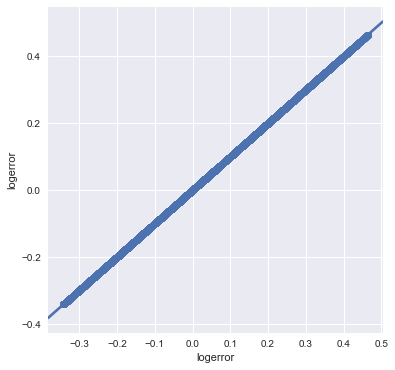

[]

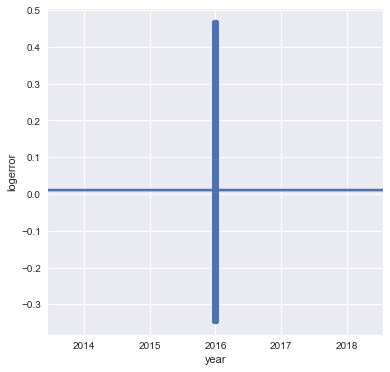

[]

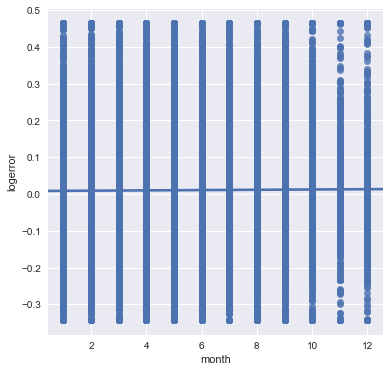

[]

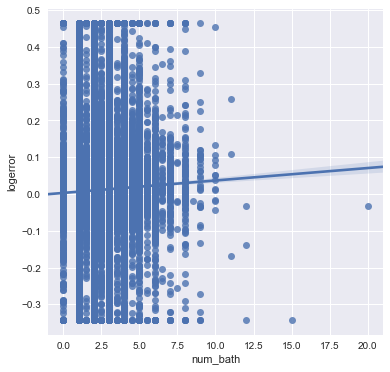

[]

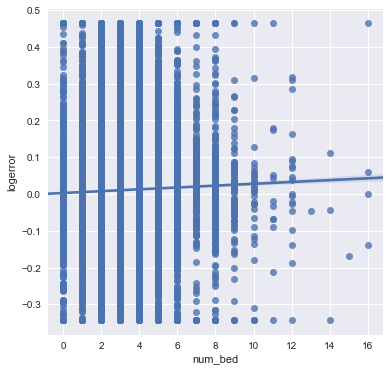

[]

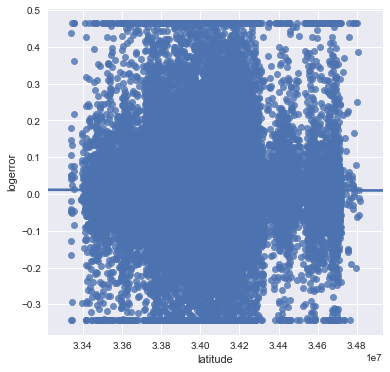

[]

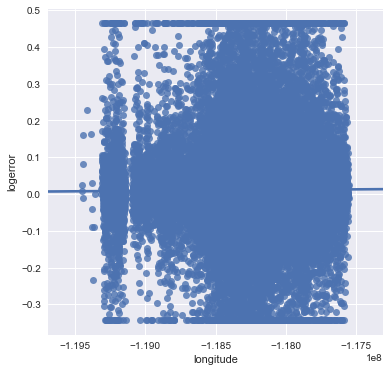

[]

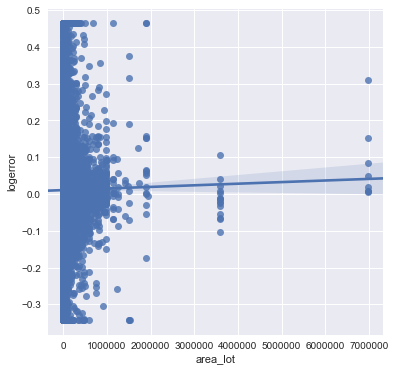

[]

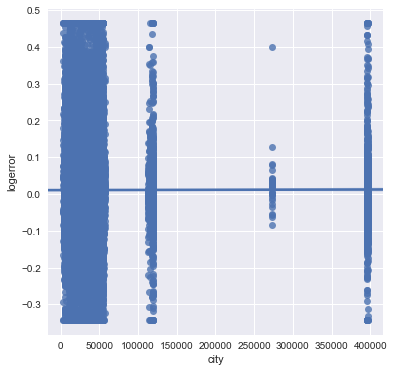

[]

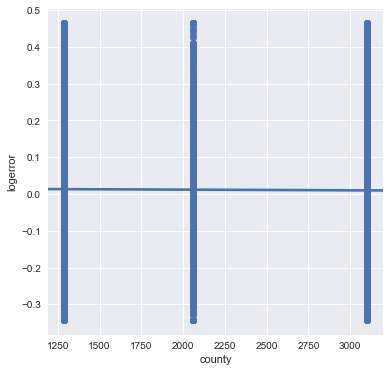

[]

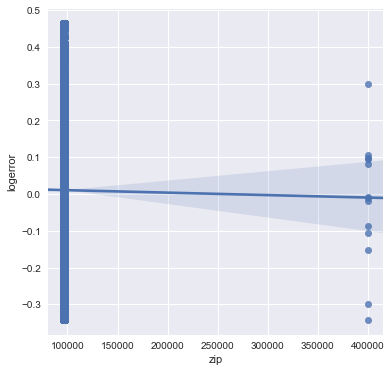

[]

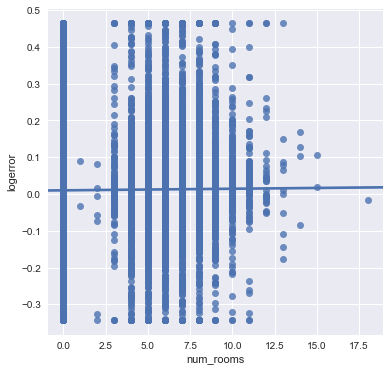

[]

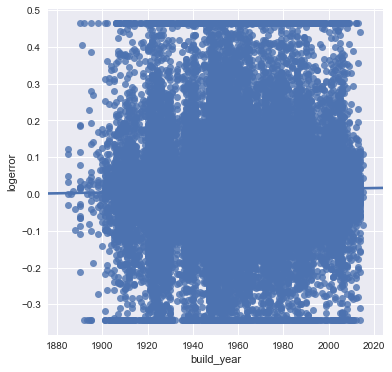

[]

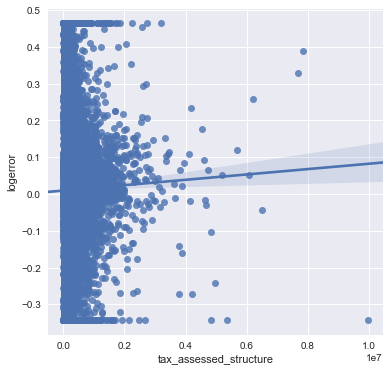

[]

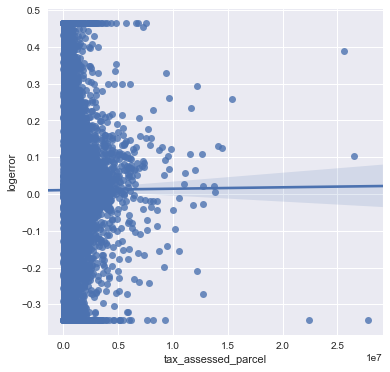

[]

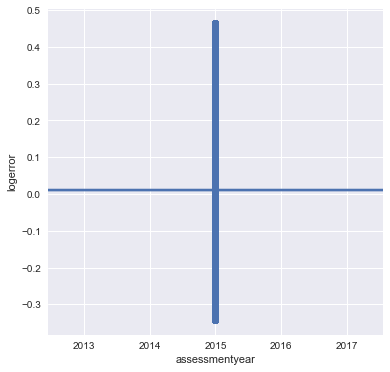

[]

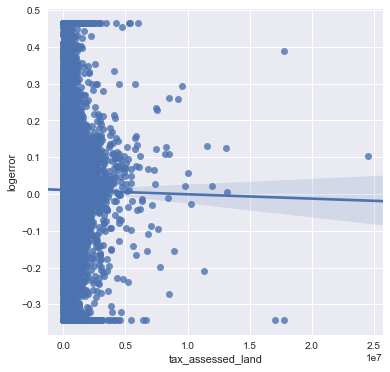

[]

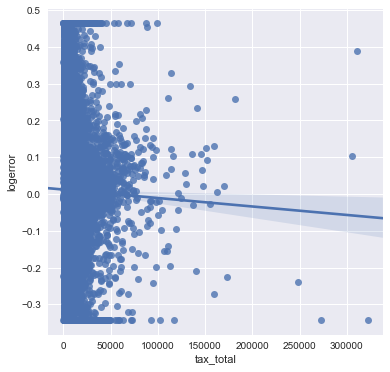

[]

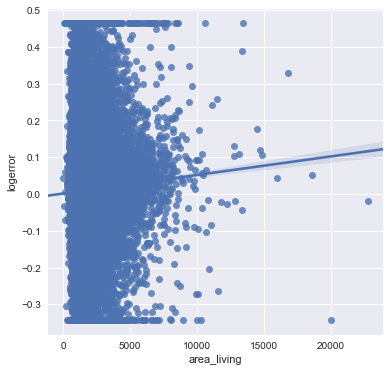

In [26]:
cols = list(df.select_dtypes(include=[np.number]).columns.values)

for i in cols:
    plt.figure(figsize=(6,6))
    sns.regplot(df[i], df.logerror)
    plt.plot()
    plt.show()

In [27]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('logerror ~ area_living',df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 15 Sep 2017   Prob (F-statistic):           4.13e-40
Time:                        16:39:43   Log-Likelihood:                 68694.
No. Observations:               79620   AIC:                        -1.374e+05
Df Residuals:                   79618   BIC:                        -1.374e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0015      0.001      1.958      0.050     -1.21e-06     0.003
area_living   5.04e-06    3.8e-07     13.264      0.000       4.3e-06  5.78e-06
==============================================================================
Omnibus:                    17723.913   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139455.845
Skew:                           0.859   Prob(JB):                         0.00
Kurtosis:                       9.252   Cond. No.                     4.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('logerror ~ area_lot',df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.098
Date:                Fri, 15 Sep 2017   Prob (F-statistic):              0.147
Time:                        16:41:03   Log-Likelihood:                 68607.
No. Observations:               79620   AIC:                        -1.372e+05
Df Residuals:                   79618   BIC:                        -1.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0106      0.000     28.421      0.000         0.010     0.011
area_lot    4.352e-09      3e-09      1.448      0.147     -1.54e-09  1.02e-08
==============================================================================
Omnibus:                    17780.095   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137444.767
Skew:                           0.867   Prob(JB):                         0.00
Kurtosis:                       9.199   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
from sklearn.linear_model import LinearRegression

Z = df.drop(['logerror','parcelid','year','latitude','longitude','assessmentyear'], axis = 1)
Z = Z.select_dtypes(include=[np.number])

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Z, df.logerror, test_size = 0.3, random_state=42)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
lm.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [192]:
pd.DataFrame(list(zip(Xtrain.columns, lm.coef_)), columns = ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,index_orig,3.471444e-08
1,month,1.119980e-05
2,num_bath,-1.519429e-05
3,num_bed,-2.106008e-04
4,area_lot,4.762546e-09
5,city,2.805659e-09
6,county,-1.154693e-07
7,zip,-1.485483e-07
8,num_rooms,-1.631768e-04
9,build_year,3.177037e-05


In [193]:
pred1 = lm.predict(Xtest)
pred1

array([ 0.00752735,  0.00422689,  0.01828498, ...,  0.01624299,
        0.00675591,  0.00502823])

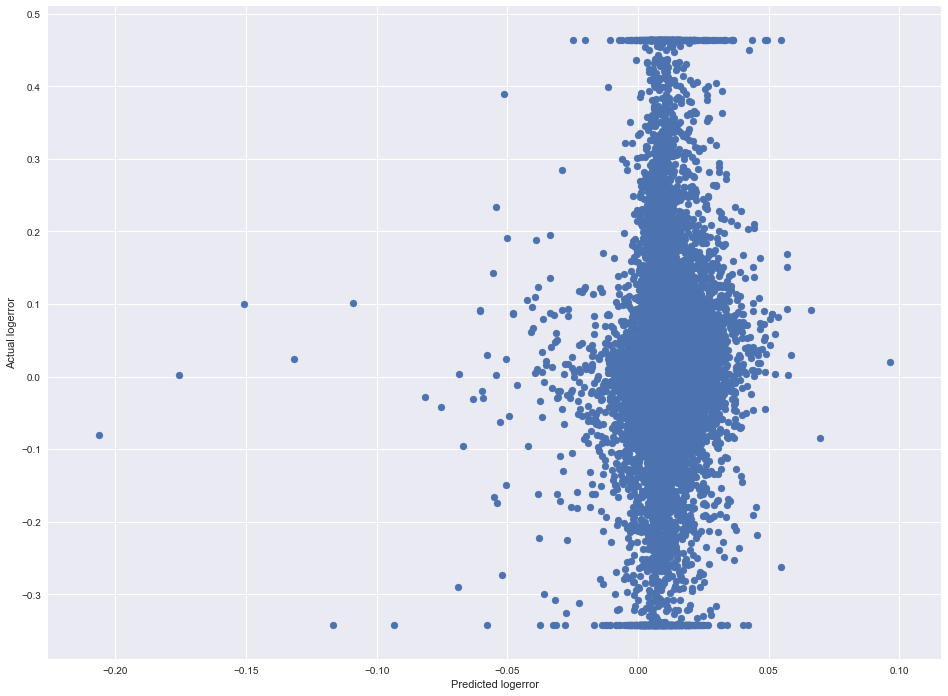

In [194]:
plt.scatter(pred1, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [195]:
class fullprint:
    'context manager for printing full numpy arrays'

    def __init__(self, **kwargs):
        if 'threshold' not in kwargs:
            kwargs['threshold'] = np.nan
        self.opt = kwargs

    def __enter__(self):
        self._opt = np.get_printoptions()
        np.set_printoptions(**self.opt)

    def __exit__(self, type, value, traceback):
        np.set_printoptions(**self._opt)

# a = np.arange(1001)

# with fullprint():
#     print(a)

# print(a)

# with fullprint(threshold=None, edgeitems=10):
#     print(a)

In [196]:
pred1

array([ 0.00752735,  0.00422689,  0.01828498, ...,  0.01624299,
        0.00675591,  0.00502823])

In [197]:
with fullprint(threshold=None, edgeitems=20):
    print(pred1)

[ 0.00752735  0.00422689  0.01828498  0.00030495  0.0227546  -0.00144645
  0.00871965  0.01038823  0.00590895  0.00371057  0.00852625  0.00755421
  0.00891803  0.01323345  0.00564214  0.01128638  0.01449234  0.01592938
  0.01236277  0.00386663 ...,  0.01362681  0.0118165   0.03188788
  0.01229635  0.00711813  0.03319145  0.00396766  0.01149487  0.01229513
  0.01532076  0.01224766  0.0111441   0.00732886  0.01464576  0.01587934
  0.00589155  0.00763401  0.01624299  0.00675591  0.00502823]


31684   -0.070373
5771     0.012227
62584    0.105985
44701   -0.104995
57294    0.037855
40047    0.151754
54821    0.026920
64473    0.088388
19765    0.066709
46841   -0.019989
41577   -0.157874
26061   -0.011246
13308   -0.029382
56593   -0.114267
47720   -0.024858
11199   -0.036514
73853    0.049092
66213    0.023929
69089    0.014363
49530   -0.005133
62886   -0.010321
77795    0.047424
50014    0.001786
4492    -0.077689
25669    0.015629
29573   -0.458868
16369   -0.000964
11129   -0.015076
77270    0.020545
40500   -0.048394
           ...   
26180   -0.149989
53684    0.073767
45239    0.104924
45696   -0.010008
6118    -0.004745
78615   -0.112117
28921    0.004209
29311   -0.072740
13719   -0.039661
76620    0.020953
31410   -0.000273
61757   -0.008983
4931    -0.017812
5444     0.018296
52521    0.349618
2984    -0.011809
38517   -0.094032
20444   -0.036305
68995   -0.042205
77445    0.017321
6128     0.043748
51390   -0.452738
39366    0.031629
63906   -0.120754
65172   -0

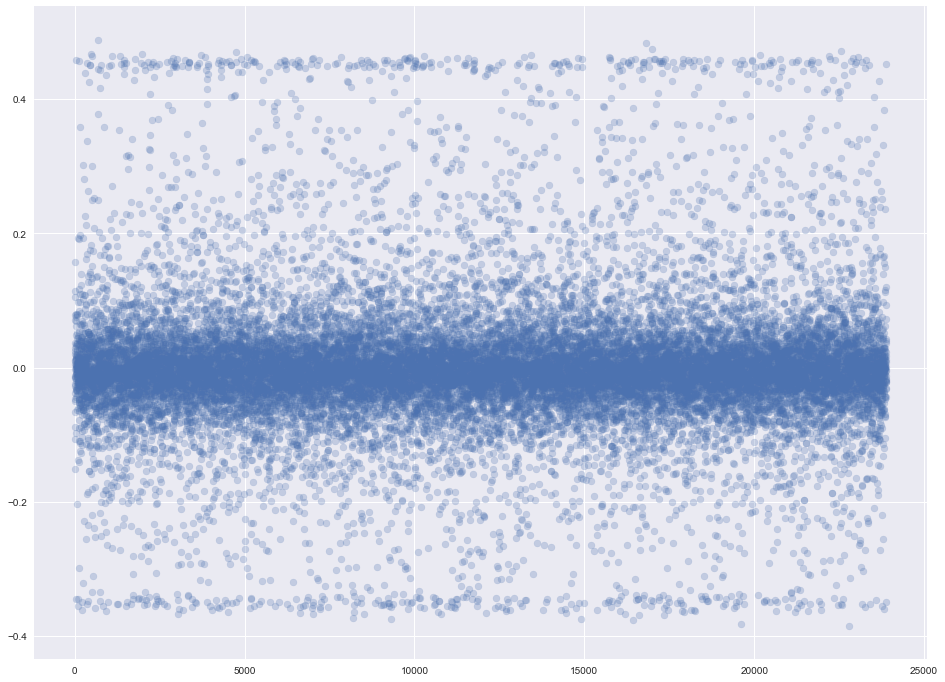

In [210]:
pred1-Ytest
plt.scatter(range(len(Ytest)),Ytest-pred1, alpha = .25)

In [319]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Z, df.logerror, test_size = .3, random_state=42)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

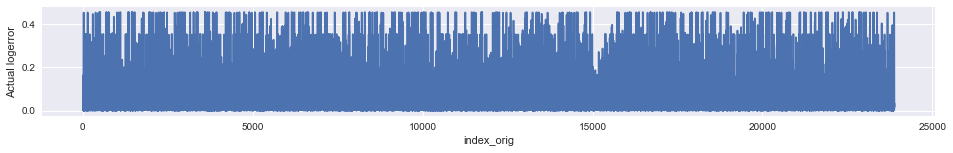

The MSE of the prediction is: 0.0107012780739


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

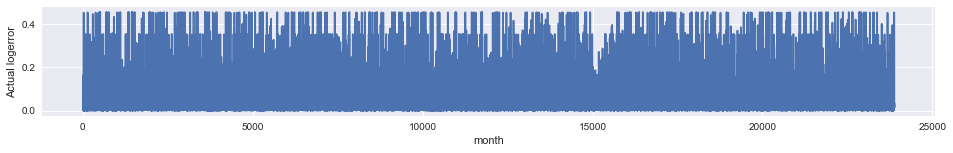

The MSE of the prediction is: 0.0107010706455


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

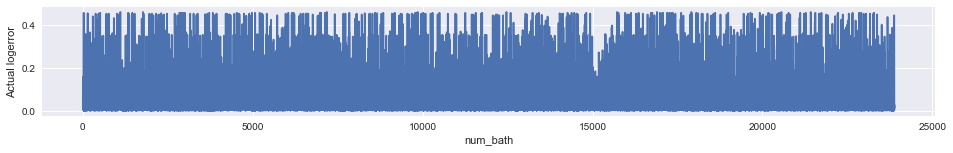

The MSE of the prediction is: 0.0107007310567


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

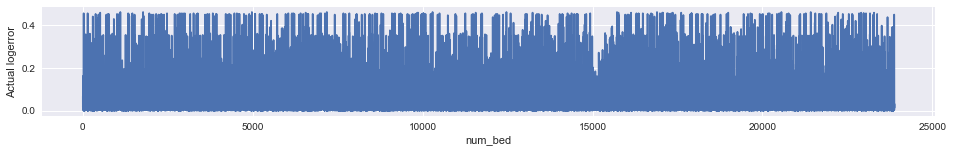

The MSE of the prediction is: 0.0107041686621


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

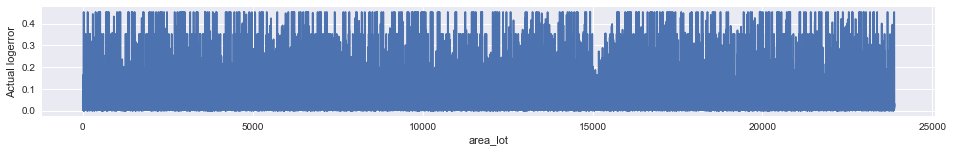

The MSE of the prediction is: 0.0107020258


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

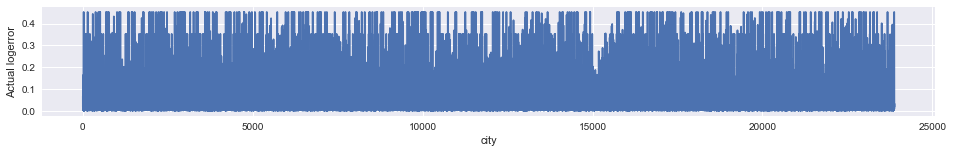

The MSE of the prediction is: 0.0107025586435


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

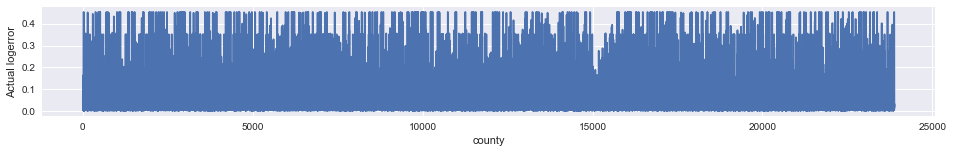

The MSE of the prediction is: 0.010702483987


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

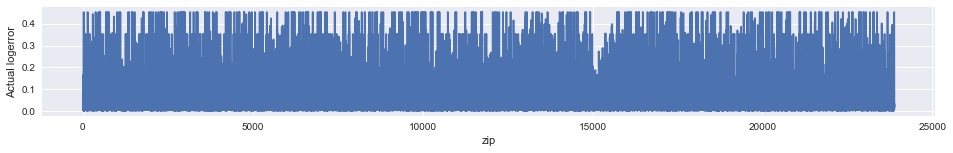

The MSE of the prediction is: 0.0107027000374


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

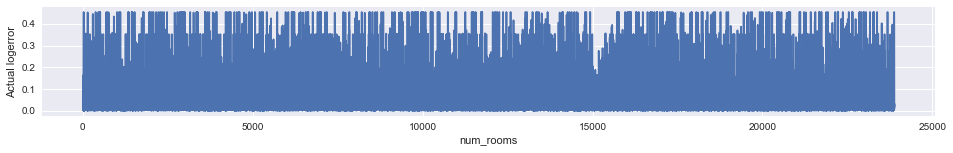

The MSE of the prediction is: 0.0107016216541


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

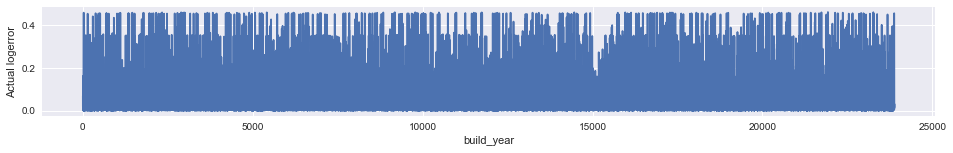

The MSE of the prediction is: 0.0106971754048


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

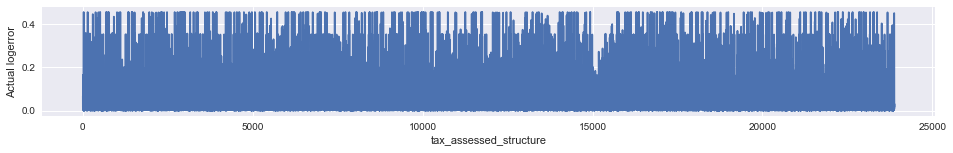

The MSE of the prediction is: 0.0107052902679


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

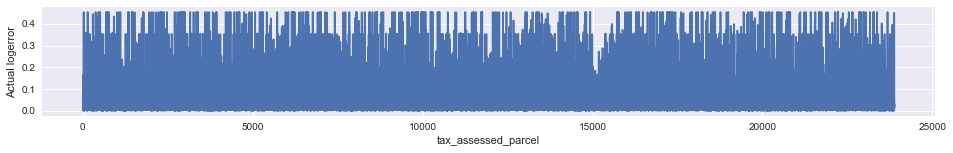

The MSE of the prediction is: 0.0107063684377


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

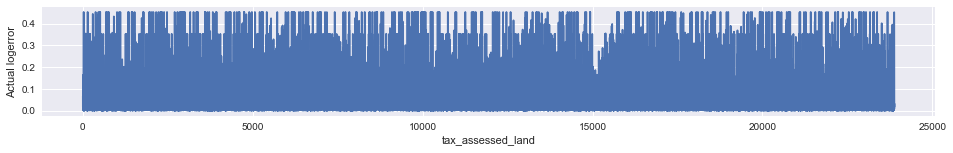

The MSE of the prediction is: 0.0107037487929


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

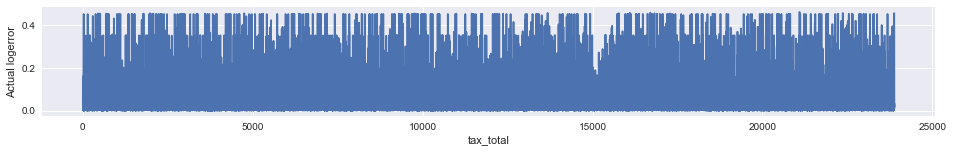

The MSE of the prediction is: 0.0106973733535


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

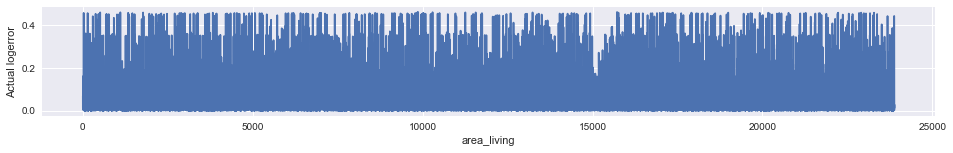

The MSE of the prediction is: 0.0106873099356


In [320]:
from sklearn.model_selection import train_test_split

def plot1(r,p,yt):
    plt.figure(figsize=(16,2))
    diff = np.abs(p-yt)
    plt.plot(r,diff)
#     plt.plot(r,diff.rolling(window=100,center=False).mean())
    label = Z[[i]].columns[0]
    plt.xlabel(label)
    plt.ylabel('Actual logerror')
    plt.show()

MSEs = []
for i in Z:
    lm.fit(Xtrain[[i]], Ytrain)
    pred = lm.predict(Xtest[[i]])
    r = range(Ytest.shape[0])
    p = pred
    yt = Ytest
    plot1(r,p,yt)
    from sklearn.metrics import mean_squared_error as mse
    MSE = mse(Ytest, pred)
    print('The MSE of the prediction is:', MSE)
    MSEs.append(MSE)

In [321]:
MSEs
print('The max MSE is',max(MSEs))
print('The min MSE is',min(MSEs))

[0.010701278073916494,
 0.010701070645515938,
 0.010700731056673948,
 0.010704168662147918,
 0.010702025799979921,
 0.01070255864348109,
 0.010702483987023849,
 0.010702700037429782,
 0.010701621654108108,
 0.010697175404783659,
 0.010705290267882403,
 0.010706368437715037,
 0.010703748792877214,
 0.010697373353478716,
 0.010687309935553856]

The max MSE is 0.0107063684377
The min MSE is 0.0106873099356


In [39]:
from sklearn.metrics import mean_squared_error as mse

print('The MSE of the prediction is:', mse(df.logerror, pred1))

The MSE of the prediction is: 0.0103699747326


In [51]:
lm = LinearRegression()
lm.fit(X[['area_living']], df.logerror)
mse_area_living = np.mean((df.logerror - lm.predict(X[['area_living']])) ** 2)
print('The MSE of the prediction is:', mse_area_living)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010426243204322175


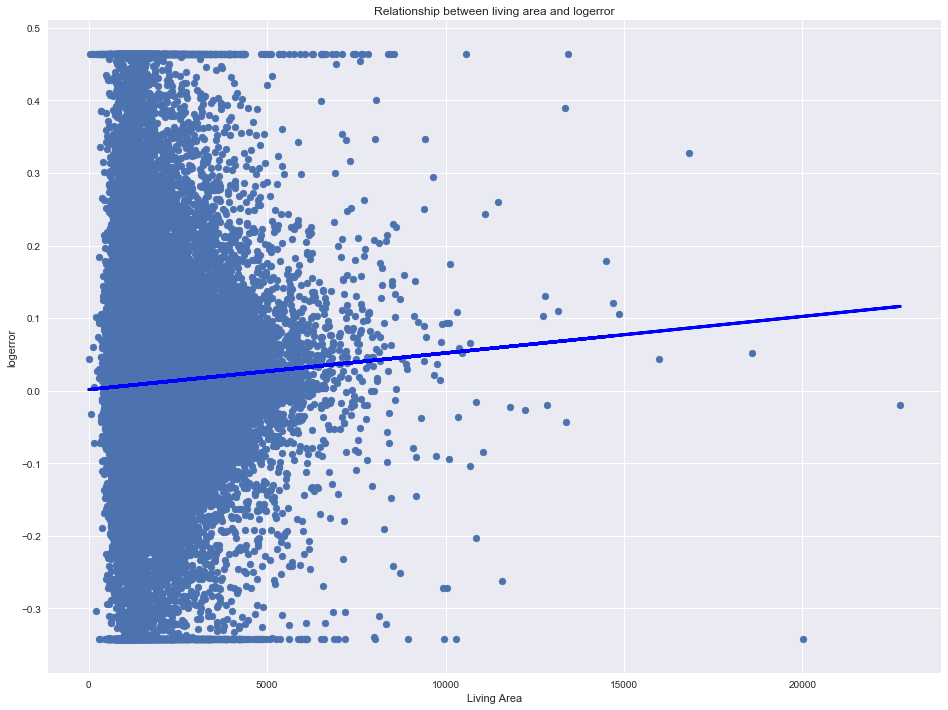

In [44]:
plt.scatter(df.area_living, df.logerror)
plt.xlabel("Living Area")
plt.ylabel("logerror")
plt.title("Relationship between living area and logerror")

plt.plot(df.area_living, lm.predict(X[['area_living']]), color='blue', linewidth=3)
plt.show()

In [52]:
lm = LinearRegression()
lm.fit(X[['area_lot']], df.logerror)
mse_area_lot = np.mean((df.logerror - lm.predict(X[['area_lot']])) ** 2)
print('The MSE of the prediction is:', mse_area_lot)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010449007048689158


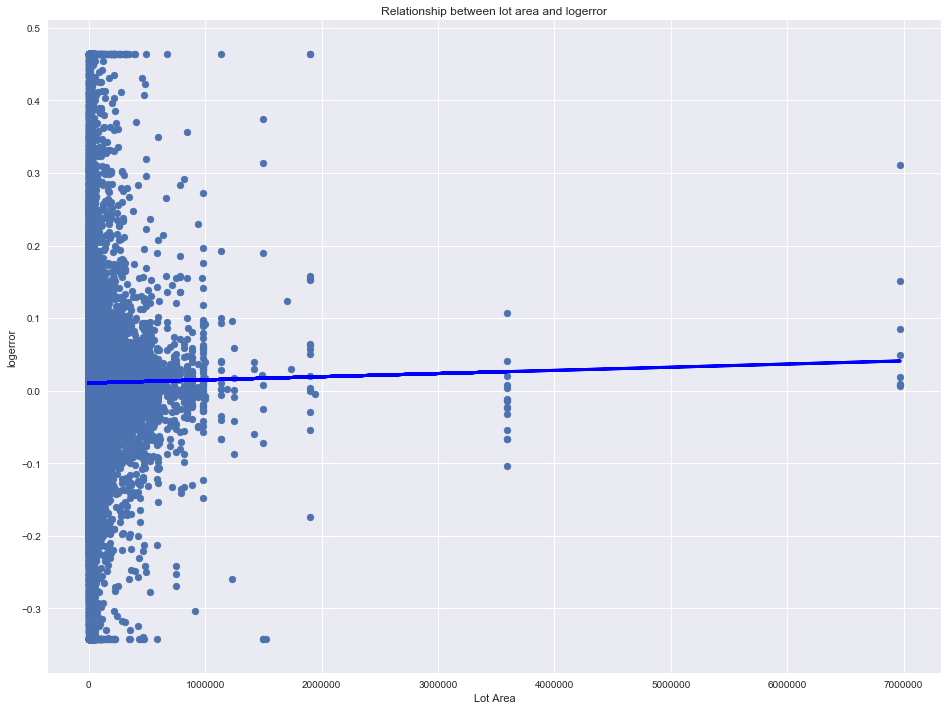

In [47]:
plt.scatter(df.area_lot, df.logerror)
plt.xlabel("Lot Area")
plt.ylabel("logerror")
plt.title("Relationship between lot area and logerror")

plt.plot(df.area_lot, lm.predict(X[['area_lot']]), color='blue', linewidth=3)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010441322861353767


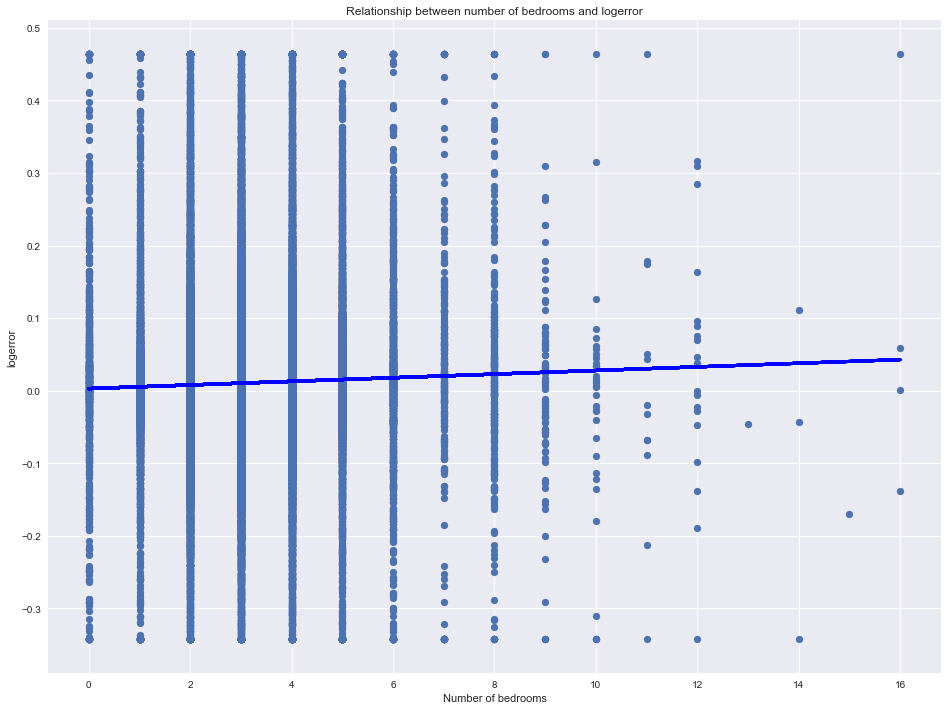

In [53]:
lm = LinearRegression()
lm.fit(X[['num_bed']], df.logerror)
mse_num_bed = np.mean((df.logerror - lm.predict(X[['num_bed']])) ** 2)
print('The MSE of the prediction is:', mse_num_bed)

plt.scatter(df.num_bed, df.logerror)
plt.xlabel("Number of bedrooms")
plt.ylabel("logerror")
plt.title("Relationship between number of bedrooms and logerror")

plt.plot(df.num_bed, lm.predict(X[['num_bed']]), color='blue', linewidth=3)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.01044362412196041


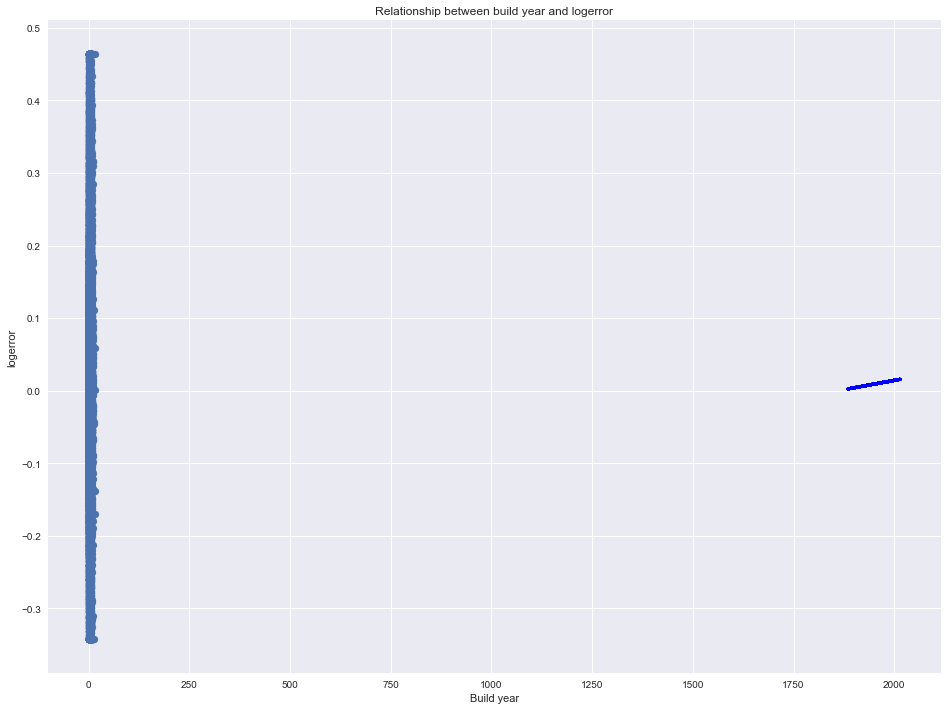

In [54]:
lm = LinearRegression()
lm.fit(X[['build_year']], df.logerror)
mse_area_lot = np.mean((df.logerror - lm.predict(X[['build_year']])) ** 2)
print('The MSE of the prediction is:', mse_area_lot)

plt.scatter(df.num_bed, df.logerror)
plt.xlabel("Build year")
plt.ylabel("logerror")
plt.title("Relationship between build year and logerror")

plt.plot(df.build_year, lm.predict(X[['build_year']]), color='blue', linewidth=3)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010447727118424593


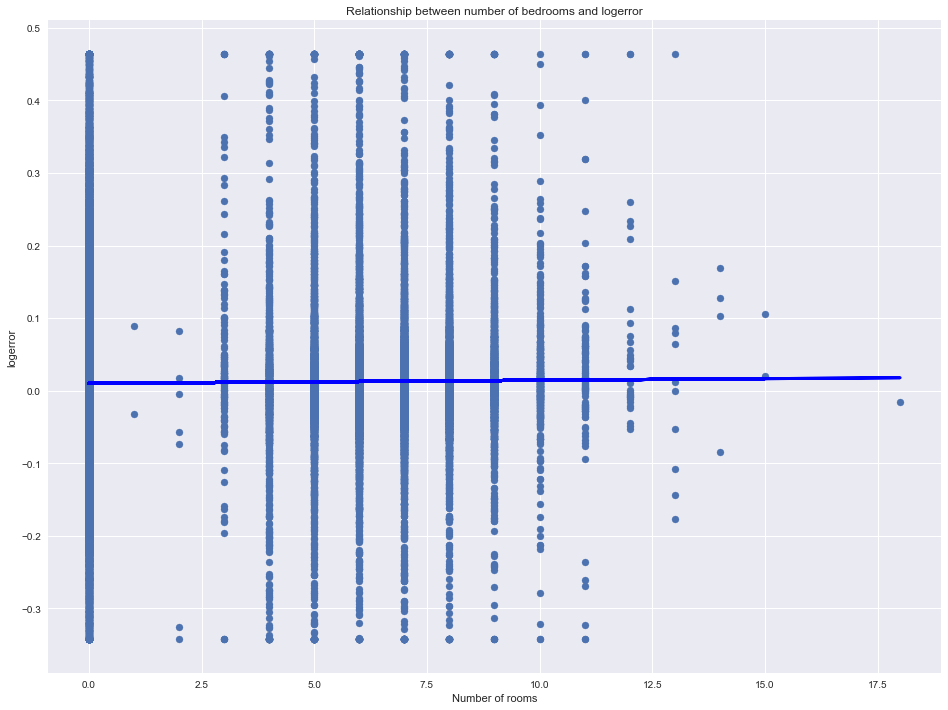

In [55]:
lm = LinearRegression()
lm.fit(X[['num_rooms']], df.logerror)
mse_num_rooms = np.mean((df.logerror - lm.predict(X[['num_rooms']])) ** 2)
print('The MSE of the prediction is:', mse_num_rooms)

plt.scatter(df.num_rooms, df.logerror)
plt.xlabel("Number of rooms")
plt.ylabel("logerror")
plt.title("Relationship between number of bedrooms and logerror")

plt.plot(df.num_rooms, lm.predict(X[['num_rooms']]), color='blue', linewidth=3)
plt.show()

In [45]:
lm.fit(X[['area_living','area_lot','num_bed','num_bath','build_year','month','num_rooms']],df.logerror)
pred2 = lm.predict(X[['area_living','area_lot','num_bed','num_bath','build_year','month','num_rooms']])
print('The mean squared error for these variables is:', mse(df.logerror, pred2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The mean squared error for these variables is: 0.0104220641981
